#Markov processes and Applications - Numerical Project
##Markov Jump Process for Labour Dynamics Model
##Maria Joseph and Eva Mukherjee

#Introduction


In labor market dynamics, understanding the transition out of unemployment is crucial for analyzing job search behavior and labor force participation. Workers continuously move between states of employment (E), unemployment (U), and inactivity or being out of the labor force (O), reflecting complex behavioral and institutional factors. To capture these dynamics, we model the labor market as a continuous-time Markov jump process with three states: E, U, and O. The transition intensities between these states are encoded in a generator matrix, allowing for a probabilistic yet tractable representation of individual labor market trajectories. This framework enables us to analytically compute key quantities such as the stationary distribution—reflecting the long-run proportions of the population in each state—and the expected time to reach employment starting from either unemployment or inactivity. These theoretical insights are further supported by numerical simulations, offering a comprehensive view of absorption dynamics in the labor market.

## Definition of the Model



We model an individual's employment status over time as a **continuous-time Markov chain (CTMC)** $\{X(t)\}_{t \geq 0}$, where:

    

*   $X(t) \in S = \{E, U, O\}$ represents the employment state at time $t$.
*   Transitions between states follow **exponential holding times** with rates defined by the generator matrix $Q$.


    


We define the discrete state space $S$ for an individual's employment status as:
* $E$: Employed
* $U$: Unemployed
* $0$: Out of Labour Force

The model allows for transitions between all pairs of these states. For an individual in state $i$, they can transition to state $j$ ($i \neq j$) with a constant rate $\lambda_{ij} \ge 0$. These rates represent the intensity of the random events causing status changes:
* $\lambda_{EU}$: Rate of job loss (E $\to$ U)
* $\lambda_{EO}$: Rate of leaving the labor force from employment (E $\to$ O)
* $\lambda_{UE}$: Rate of finding a job from unemployment (U $\to$ E)
* $\lambda_{UO}$: Rate of leaving the labor force from unemployment (U $\to$ O)
* $\lambda_{OE}$: Rate of entering employment from out of the labor force (O $\to$ E)
* $\lambda_{OU}$: Rate of entering unemployment from out of the labor force (O $\to$ U)

The holding time in each state $i$ before a transition occurs is exponentially distributed with rate $q_i = \sum_{j \neq i} \lambda_{ij}$.

Under the assumption that all transition rates $\lambda_{ij}$ for $i \neq j$ are strictly positive, this Markov Jump Process is irreducible and aperiodic.

* **Irreducible:** If all six transition rates are positive, it is possible to transition between any pair of states (E $\leftrightarrow$ U, E $\leftrightarrow$ O, U $\leftrightarrow$ O). For example, to go from E to O, you can go directly E $\to$ O (rate $\lambda_{EO} > 0$). To go from E to U, you can go directly E $\to$ U (rate $\lambda_{EU} > 0$). So, the chain is irreducible.

* **Aperiodic:** In a continuous-time Markov chain, if the chain is irreducible, then it is aperiodic. This is because the exponential holding times allow transitions to occur at any point in continuous time.

The dynamics of this 3-state Markov Jump Process are governed by its Generator Matrix ($Q$), a $3 \times 3$ matrix where the rows and columns correspond to the states $\{E, U, O\}$. The off-diagonal entries $Q_{ij}$ ($i \neq j$) are the transition rates $\lambda_{ij}$. The diagonal entries $Q_{ii}$ are the negative of the total rate of leaving state $i$: $Q_{ii} = -\sum_{j \neq i} \lambda_{ij}$.

The Generator Matrix is:

$$
Q = \begin{pmatrix}
-\lambda_{EU} - \lambda_{EO} & \lambda_{EU} & \lambda_{EO} \\
\lambda_{UE} & -\lambda_{UE} - \lambda_{UO} & \lambda_{UO} \\
\lambda_{OE} & \lambda_{OU} & -\lambda_{OE} - \lambda_{OU}
\end{pmatrix}
$$

## Theoretical Result

For an irreducible, and aperiodic continuous-time Markov chain, a unique stationary distribution $\pi = (\pi_E, \pi_U, \pi_O)$ exists such that $$\pi Q = \mathbf{0}$$
$\pi = (\pi_E, \pi_U, \pi_O)$ is the row vector representing the stationary distribution

$Q$ is the generator matrix. <br> <br>

We will focus on the determination of the stationary distribution $(\pi)$ of this Markov Jump Process.

## Proof:

$$
(\pi_E, \pi_U, \pi_O) \begin{pmatrix}
-\lambda_{EU} - \lambda_{EO} & \lambda_{EU} & \lambda_{EO} \\
\lambda_{UE} & -\lambda_{UE} - \lambda_{UO} & \lambda_{UO} \\
\lambda_{OE} & \lambda_{OU} & -\lambda_{OE} - \lambda_{OU}
\end{pmatrix} = (0, 0, 0)
$$

From this, we obtain a system of three linear equations:

1)  $\pi_E (-\lambda_{EU} - \lambda_{EO}) + \pi_U (\lambda_{UE}) + \pi_O (\lambda_{OE}) = 0$ <br>
2)  $\pi_E (\lambda_{EU}) + \pi_U (-\lambda_{UE} - \lambda_{UO}) + \pi_O (\lambda_{OU}) = 0$ <br>
3)   $\pi_E (\lambda_{EO}) + \pi_U (\lambda_{UO}) + \pi_O (-\lambda_{OE} - \lambda_{OU}) = 0$

Notice that these three equations are linearly dependent (since the columns of $Q$ sum to zero, the sum of the three equations is $0$). We only need two independent equations from this system.

4) $\pi_E + \pi_U + \pi_O = 1$             


We will solve the system using equations (1), (2), and (4).

From equation (4), we can express $\pi_O$ in terms of $\pi_E$ and $\pi_U$:
$$\pi_O = 1 - \pi_E - \pi_U$$

Substitute this expression for $\pi_O$ into equation (1):
$$(-\lambda_{EU} - \lambda_{EO}) \pi_E + \lambda_{UE} \pi_U + \lambda_{OE} (1 - \pi_E - \pi_U) = 0$$
$$-\lambda_{EU} \pi_E - \lambda_{EO} \pi_E + \lambda_{UE} \pi_U + \lambda_{OE} - \lambda_{OE} \pi_E - \lambda_{OE} \pi_U = 0$$

$$(-\lambda_{EU} - \lambda_{EO} - \lambda_{OE}) \pi_E + (\lambda_{UE} - \lambda_{OE}) \pi_U = -\lambda_{OE}$$



Now, substitute the expression for $\pi_O$ into equation (2):
$$\lambda_{EU} \pi_E + (-\lambda_{UE} - \lambda_{UO}) \pi_U + \lambda_{OU} (1 - \pi_E - \pi_U) = 0$$
$$\lambda_{EU} \pi_E - \lambda_{UE} \pi_U - \lambda_{UO} \pi_U + \lambda_{OU} - \lambda_{OU} \pi_E - \lambda_{OU} \pi_U = 0$$

$$(\lambda_{EU} - \lambda_{OU}) \pi_E + (-\lambda_{UE} - \lambda_{UO} - \lambda_{OU}) \pi_U = -\lambda_{OU}$$

Now we have a system of two linear equations with two unknowns ($\pi_E$ and $\pi_U$):
5. $(-\lambda_{EU} - \lambda_{EO} - \lambda_{OE}) \pi_E + (\lambda_{UE} - \lambda_{OE}) \pi_U = -\lambda_{OE}$
6. $(\lambda_{EU} - \lambda_{OU}) \pi_E + (-\lambda_{UE} - \lambda_{UO} - \lambda_{OU}) \pi_U = -\lambda_{OU}$

We can solve this system for $\pi_E$ and $\pi_U$. Let's solve equation (5) for $\pi_U$ (assuming $(\lambda_{UE} - \lambda_{OE}) \neq 0$):
$$(\lambda_{UE} - \lambda_{OE}) \pi_U = -\lambda_{OE} - (-\lambda_{EU} - \lambda_{EO} - \lambda_{OE}) \pi_E$$$$(\lambda_{UE} - \lambda_{OE}) \pi_U = -\lambda_{OE} + (\lambda_{EU} + \lambda_{EO} + \lambda_{OE}) \pi_E$$$$\pi_U = \frac{(\lambda_{EU} + \lambda_{EO} + \lambda_{OE}) \pi_E - \lambda_{OE}}{\lambda_{UE} - \lambda_{OE}}$$

Substitute this expression for $\pi_U$ into equation (6):
$$(\lambda_{EU} - \lambda_{OU}) \pi_E + (-\lambda_{UE} - \lambda_{UO} - \lambda_{OU}) \left(\frac{(\lambda_{EU} + \lambda_{EO} + \lambda_{OE}) \pi_E - \lambda_{OE}}{\lambda_{UE} - \lambda_{OE}}\right) = -\lambda_{OU}$$


Multiply the entire equation by $(\lambda_{UE} - \lambda_{OE})$ :
$$(\lambda_{EU} - \lambda_{OU})(\lambda_{UE} - \lambda_{OE}) \pi_E + (-\lambda_{UE} - \lambda_{UO} - \lambda_{OU}) ((\lambda_{EU} + \lambda_{EO} + \lambda_{OE}) \pi_E - \lambda_{OE}) = -\lambda_{OU}(\lambda_{UE} - \lambda_{OE})$$

$$[(\lambda_{EU} - \lambda_{OU})(\lambda_{UE} - \lambda_{OE}) + (-\lambda_{UE} - \lambda_{UO} - \lambda_{OU}) (\lambda_{EU} + \lambda_{EO} + \lambda_{OE})] \pi_E + \lambda_{OE}(\lambda_{UE} + \lambda_{UO} + \lambda_{OU}) = -\lambda_{OU}(\lambda_{UE} - \lambda_{OE})$$

$$[(\lambda_{EU} - \lambda_{OU})(\lambda_{UE} - \lambda_{OE}) + (-\lambda_{UE} - \lambda_{UO} - \lambda_{OU}) (\lambda_{EU} + \lambda_{EO} + \lambda_{OE})] \pi_E = -\lambda_{OU}(\lambda_{UE} - \lambda_{OE}) - \lambda_{OE}(\lambda_{UE} + \lambda_{UO} + \lambda_{OU})$$

Solve for $\pi_E$:
$$\pi_E = \frac{-\lambda_{OU}(\lambda_{UE} - \lambda_{OE}) - \lambda_{OE}(\lambda_{UE} + \lambda_{UO} + \lambda_{OU})}{(\lambda_{EU} - \lambda_{OU})(\lambda_{UE} - \lambda_{OE}) + (-\lambda_{UE} - \lambda_{UO} - \lambda_{OU}) (\lambda_{EU} + \lambda_{EO} + \lambda_{OE})}$$

$$ = \frac{-(\lambda_{OU}\lambda_{UE} + \lambda_{OE}\lambda_{UE} + \lambda_{OE}\lambda_{UO})}{-\lambda_{EU}\lambda_{OE} - \lambda_{OU}\lambda_{UE} - \lambda_{UE}\lambda_{EO} - \lambda_{UE}\lambda_{OE} - \lambda_{UO}\lambda_{EU} - \lambda_{UO}\lambda_{EO} - \lambda_{UO}\lambda_{OE} - \lambda_{OU}\lambda_{EU} - \lambda_{OU}\lambda_{EO}}$$

$$\boxed {\pi_E= \frac{(\lambda_{OU}\lambda_{UE} + \lambda_{OE}\lambda_{UE} + \lambda_{OE}\lambda_{UO})}{\lambda_{EU}\lambda_{OE} + \lambda_{OU}\lambda_{UE} + \lambda_{UE}\lambda_{EO} + \lambda_{UE}\lambda_{OE} + \lambda_{UO}\lambda_{EU} + \lambda_{UO}\lambda_{EO} + \lambda_{UO}\lambda_{OE} + \lambda_{OU}\lambda_{EU} + \lambda_{OU}\lambda_{EO}}}$$

By substituting the value of $\pi_E$ in $\pi_U$ we get that,
$$ \boxed {\pi_U = \frac{
(\lambda_{EU} + \lambda_{EO} + \lambda_{OE}) \cdot \left[ \frac{
- \lambda_{OU}(\lambda_{UE} - \lambda_{OE}) - \lambda_{OE}(\lambda_{UE} + \lambda_{UO} + \lambda_{OU})
}{
(\lambda_{EU} - \lambda_{OU})(\lambda_{UE} - \lambda_{OE}) + (-\lambda_{UE} - \lambda_{UO} - \lambda_{OU})(\lambda_{EU} + \lambda_{EO} + \lambda_{OE})
} \right] + \lambda_{OE}
}{
\lambda_{UE} - \lambda_{OE}
} }$$

We previously had:

1.  
$$
\pi_U = \frac{ (\lambda_{EU} + \lambda_{EO} + \lambda_{OE})\pi_E - \lambda_{OE} }{ \lambda_{UE} - \lambda_{OE} }
$$

2.  
$$
\pi_O = 1 - \pi_E - \pi_U
$$

Now substitute (1) into (2):

$$
\pi_O = 1 - \pi_E - \left( \frac{ (\lambda_{EU} + \lambda_{EO} + \lambda_{OE})\pi_E - \lambda_{OE} }{ \lambda_{UE} - \lambda_{OE} } \right)
$$

$$
= 1 - \pi_E - \frac{ (\lambda_{EU} + \lambda_{EO} + \lambda_{OE})\pi_E }{ \lambda_{UE} - \lambda_{OE} } + \frac{ \lambda_{OE} }{ \lambda_{UE} - \lambda_{OE} }
$$

$$
= 1 - \pi_E \left(1 + \frac{ \lambda_{EU} + \lambda_{EO} + \lambda_{OE} }{ \lambda_{UE} - \lambda_{OE} } \right) + \frac{ \lambda_{OE} }{ \lambda_{UE} - \lambda_{OE} }
$$

 Now substitute full expression for $\pi_E$:
 $$ \boxed{
\pi_O = 1 - \frac{
\left[ - \lambda_{OU}(\lambda_{UE} - \lambda_{OE}) - \lambda_{OE}(\lambda_{UE} + \lambda_{UO} + \lambda_{OU}) \right] \cdot \left(1 + \frac{ \lambda_{EU} + \lambda_{EO} + \lambda_{OE} }{ \lambda_{UE} - \lambda_{OE} } \right)
}{
(\lambda_{EU} - \lambda_{OU})(\lambda_{UE} - \lambda_{OE}) + (-\lambda_{UE} - \lambda_{UO} - \lambda_{OU})(\lambda_{EU} + \lambda_{EO} + \lambda_{OE})
}
+ \frac{ \lambda_{OE} }{ \lambda_{UE} - \lambda_{OE} }
}$$

##Simulation of the Process

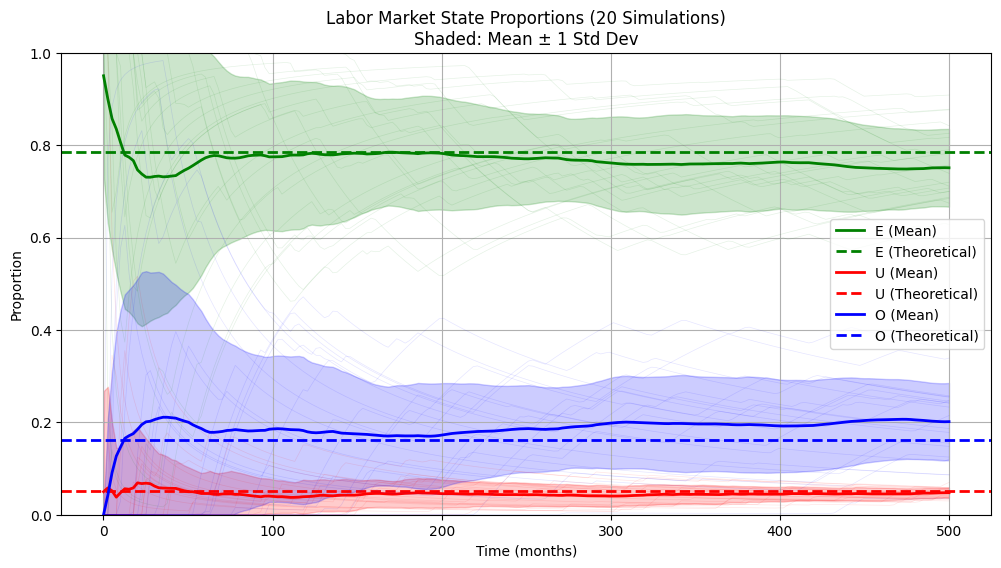

In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
import time

# Transition rates (per month)
lambda_EU = 0.02
lambda_EO = 0.01
lambda_UE = 0.30
lambda_UO = 0.10
lambda_OE = 0.05
lambda_OU = 0.03

# Generator Matrix (Q)
Q = np.array([
    [-(lambda_EU + lambda_EO), lambda_EU, lambda_EO],
    [lambda_UE, -(lambda_UE + lambda_UO), lambda_UO],
    [lambda_OE, lambda_OU, -(lambda_OE + lambda_OU)]
])

# Theoretical stationary distribution
def get_stationary_distribution(Q):
    eigenvalues, eigenvectors = np.linalg.eig(Q.T)
    pi = np.real(eigenvectors[:, np.isclose(eigenvalues, 0)])
    return (pi / pi.sum()).flatten()

pi_theoretical = get_stationary_distribution(Q)

# Simulate CTMC
def simulate_ctmc(Q, initial_state, max_time=1000):
    states = ['E', 'U', 'O']
    current_state = initial_state
    time_points = [0.0]
    state_sequence = [current_state]

    current_time = 0.0
    while current_time < max_time:
        state_idx = states.index(current_state)
        total_rate = -Q[state_idx, state_idx]
        waiting_time = np.random.exponential(scale=1/total_rate)
        current_time += waiting_time

        transition_probs = Q[state_idx, :] / total_rate
        transition_probs[state_idx] = 0
        next_state = np.random.choice(states, p=transition_probs)

        time_points.append(current_time)
        state_sequence.append(next_state)
        current_state = next_state

    return time_points, state_sequence

# Run multiple simulations
n_simulations = 20  # Number of independent runs
max_time = 500
evaluation_times = np.linspace(0.1, max_time, 200)

# Store results from all simulations
all_simulations = []

for _ in range(n_simulations):
    time_points, state_sequence = simulate_ctmc(Q, initial_state='E', max_time=max_time)
    all_simulations.append((time_points, state_sequence))

# Compute empirical proportions across simulations
states = ['E', 'U', 'O']
empirical_pi = np.zeros((len(evaluation_times), 3, n_simulations))

for sim in range(n_simulations):
    time_points, state_sequence = all_simulations[sim]
    for i, t in enumerate(evaluation_times):
        idx = np.searchsorted(time_points, t) - 1
        if idx < 0:
            idx = 0

        time_in_state = np.zeros(3)
        for j in range(1, idx+1):
            state = state_sequence[j-1]
            duration = time_points[j] - time_points[j-1]
            time_in_state[states.index(state)] += duration

        if idx < len(time_points) - 1:
            current_state = state_sequence[idx]
            remaining_time = t - time_points[idx]
            time_in_state[states.index(current_state)] += remaining_time

        empirical_pi[i, :, sim] = time_in_state / t if t > 0 else np.array([1, 0, 0])

# Calculate mean and standard deviation
mean_pi = np.mean(empirical_pi, axis=2)
std_pi = np.std(empirical_pi, axis=2)

# Plot with variability
plt.figure(figsize=(12, 6))
colors = ['green', 'red', 'blue']

for i in range(3):
    # Plot individual simulations (thin lines)
    for sim in range(n_simulations):
        plt.plot(evaluation_times, empirical_pi[:, i, sim],
                 color=colors[i], alpha=0.1, linewidth=0.5)

    # Plot mean (thick line)
    plt.plot(evaluation_times, mean_pi[:, i],
             color=colors[i], linewidth=2, label=f'{states[i]} (Mean)')

    # Plot theoretical (dashed line)
    plt.axhline(y=pi_theoretical[i], color=colors[i],
                linestyle='--', linewidth=2, label=f'{states[i]} (Theoretical)')

    # Add confidence bands (mean ± 1 std)
    plt.fill_between(evaluation_times,
                     mean_pi[:, i] - std_pi[:, i],
                     mean_pi[:, i] + std_pi[:, i],
                     color=colors[i], alpha=0.2)

plt.xlabel('Time (months)')
plt.ylabel('Proportion')
plt.title(f'Labor Market State Proportions ({n_simulations} Simulations)\nShaded: Mean ± 1 Std Dev')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.show()

The first figure, "Labor Market State Proportions", shows how the proportions of individuals in the Employed (E), Unemployed (U), and Out of the Labor Force (O) states evolve, comparing simulated averages (solid lines) with theoretical expectations (dashed lines). Across 20 simulations, the close alignment between the simulated means and theoretical values suggests the model is well-calibrated. The shaded regions, representing one standard deviation from the mean across simulations, highlight the inherent variability due to the stochastic nature of labor market transitions. The narrower band for the employed proportion indicates relatively low uncertainty in this state, while the wider bands for unemployment and being out of the labor force suggest greater sensitivity to the model's stochastic elements, reflecting the more dynamic nature of transitions into and out of these states. The clear convergence of all state proportions to stable levels over time confirms the model's tendency towards a predictable steady-state equilibrium.

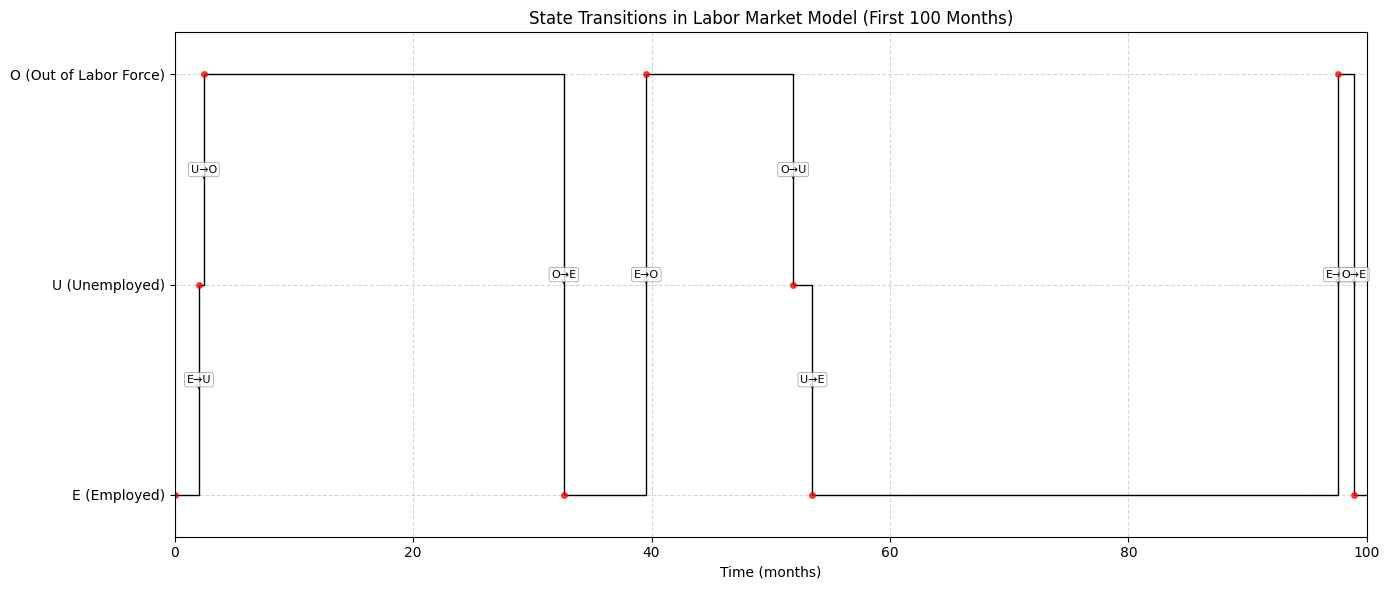

In [ ]:
# Plot the state transitions over time
plt.figure(figsize=(14, 6))

# Create a numerical representation of states for plotting
state_nums = [['E', 'U', 'O'].index(s) for s in state_sequence]

# Plot the step function
plt.step(time_points, state_nums, where='post', color='black', linewidth=1)

# Add markers for the transition points
plt.plot(time_points, state_nums, 'o', markersize=4, color='red', alpha=0.7)

# Customize y-axis
plt.yticks([0, 1, 2], ['E (Employed)', 'U (Unemployed)', 'O (Out of Labor Force)'])
plt.ylim(-0.2, 2.2)

# Highlight first 100 months to show detail (you can adjust this)
plot_limit = 100
plt.xlim(0, plot_limit)

plt.xlabel('Time (months)')
plt.title('State Transitions in Labor Market Model (First {} Months)'.format(plot_limit))
plt.grid(True, linestyle='--', alpha=0.5)

# Add annotations for transition types
for i in range(1, len(time_points)):
    if time_points[i] > plot_limit:
        break
    prev_state = state_sequence[i-1]
    new_state = state_sequence[i]
    transition_type = f"{prev_state}→{new_state}"

    # Position the annotation
    x_pos = time_points[i]
    y_pos = (['E', 'U', 'O'].index(prev_state) + ['E', 'U', 'O'].index(new_state)) / 2

    plt.annotate(transition_type,
                 (x_pos, y_pos),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center',
                 fontsize=8,
                 arrowprops=dict(arrowstyle="->", lw=0.5),
                 bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", lw=0.5, alpha=0.8))

plt.tight_layout()
plt.show()

The second figure, "State Transitions in Labor Market Model (First 100 Months)", focuses on how individuals move between labor market states during the initial phase of the simulation. The noticeable fluctuations in the rates of transition between states (e.g., E to U, U to E, E to O, O to E) during these early months reflect the system's response to the defined transition probabilities and its movement away from the initial distribution towards the equilibrium. These initial dynamics are crucial for understanding how the model behaves before reaching a stable state. As the simulation time increases within this initial 100-month window, the frequency and pattern of these transitions begin to settle, indicating that the system is finding a more stable flow between states. This stabilization of micro-level transition dynamics in the early phase is consistent with and provides the foundational mechanism for the macro-level convergence of state proportions to their steady-state values, as depicted over the longer time horizon in Figure 1.

# Theoretical Result - Expected Time to Reach Employment (E)


Let $T_E$ denote the first hitting time of the employed state $E$:
$$
T_E = \inf \{ t \geq 0 \mid X(t) = E \}
$$

We define the expected hitting times as:
$$
h_E = \mathbb{E}[T_E \mid X(0) = E] = 0, \quad
h_U = \mathbb{E}[T_E \mid X(0) = U], \quad
h_O = \mathbb{E}[T_E \mid X(0) = O]
$$

We derive a system of equations for $h_U$ and $h_O$ using first-step analysis.




We want to compute the expected value of this hitting time given that the process starts in state $ U $:
$$
\mathbb{E}[T_E \mid X(0) = U]
$$

Let:


*   $ T_1 $: the time of the first jump (i.e., the time spent in state $ U $ before transitioning),


*    $ S \in \{E, O\} $: the state entered after leaving $ U $.


Then we can write:
$
T_E = T_1 + T_E^{(\text{from next state})}
$

Taking expectations:
$$
\mathbb{E}[T_E \mid X(0) = U] = \mathbb{E}[T_1] + \mathbb{E}[T_E^{(\text{from next state})} \mid X(0) = U]
$$

Now apply the law of total expectation to the second term by conditioning on which state $ S $ is entered after leaving $ U $:
$$
\mathbb{E}[T_E^{(\text{from next state})} \mid X(0) = U]
= \sum_{s \in \{E, O\}} \mathbb{E}[T_E \mid X(0) = s] \cdot \mathbb{P}(S = s \mid X(0) = U)
$$

Let $h_s = \mathbb{E}[T_E \mid X(0) = s] $. Then:
$$
\mathbb{E}[T_E^{(\text{from next state})} \mid X(0) = U]
= h_E \cdot \frac{\lambda_{UE}}{\lambda_{UE} + \lambda_{UO}}
+ h_O \cdot \frac{\lambda_{UO}}{\lambda_{UE} + \lambda_{UO}}
$$

Since $ h_E = 0 $, this simplifies to:
$$
\mathbb{E}[T_E^{(\text{from next state})} \mid X(0) = U]
= \frac{\lambda_{UO}}{\lambda_{UE} + \lambda_{UO}} \cdot h_O
$$

The expected time until the first transition out of $ U $ is:
$$
\mathbb{E}[T_1] = \frac{1}{\lambda_{UE} + \lambda_{UO}}
$$

Therefore, we have:
$$
\mathbb{E}[T_E \mid X(0) = U]
= \frac{1}{\lambda_{UE} + \lambda_{UO}} + \frac{\lambda_{UO}}{\lambda_{UE} + \lambda_{UO}} \cdot h_O
$$

This simplifies to:
$$
h_U = \frac{1 + \lambda_{UO} h_O}{\lambda_{UE} + \lambda_{UO}} \tag{1}
$$

**From State $O$**:

From state $O$, the process can transition to:
- $E$ at rate $\lambda_{OE}$
- $U$ at rate $\lambda_{OU}$

Total rate out of $O$:
$$
\lambda_O = \lambda_{OE} + \lambda_{OU}
$$

By first-step analysis:
$$
h_O = \frac{1}{\lambda_O} + \frac{\lambda_{OE}}{\lambda_O} \cdot h_E + \frac{\lambda_{OU}}{\lambda_O} \cdot h_U
$$

Substituting $h_E = 0$:
$$
h_O = \frac{1}{\lambda_{OE} + \lambda_{OU}} + \frac{\lambda_{OU}}{\lambda_{OE} + \lambda_{OU}} \cdot h_U
$$

Multiplying both sides by $(\lambda_{OE} + \lambda_{OU})$:
$$
(\lambda_{OE} + \lambda_{OU}) h_O = 1 + \lambda_{OU} h_U
$$

Rewriting:
$$
\lambda_{OU} h_U - (\lambda_{OE} + \lambda_{OU}) h_O = -1 \tag{2}
$$

SOLVING THE SYSTEM:

From equation (1):
$$
h_U = \frac{1 + \lambda_{UO} h_O}{\lambda_{UE} + \lambda_{UO}}
$$

Substitute into equation (2):
$$
\lambda_{OU} \left( \frac{1 + \lambda_{UO} h_O}{\lambda_{UE} + \lambda_{UO}} \right) - (\lambda_{OE} + \lambda_{OU}) h_O = -1
$$

Multiply through by $(\lambda_{UE} + \lambda_{UO})$:
$$
\lambda_{OU}(1 + \lambda_{UO} h_O) - (\lambda_{OE} + \lambda_{OU})(\lambda_{UE} + \lambda_{UO}) h_O = -(\lambda_{UE} + \lambda_{UO})
$$

Rearranging:
$$
\left[ (\lambda_{UE} + \lambda_{UO})(\lambda_{OE} + \lambda_{OU}) - \lambda_{OU} \lambda_{UO} \right] h_O = \lambda_{UE} + \lambda_{UO} + \lambda_{OU}
$$

FINAL RESULTS

**Expected time to reach employment from state $O$:**
$$
\boxed{
h_O = \frac{ \lambda_{UE} + \lambda_{UO} + \lambda_{OU} }{ (\lambda_{UE} + \lambda_{UO})(\lambda_{OE} + \lambda_{OU}) - \lambda_{OU} \lambda_{UO} }
}
$$

**Expected time to reach employment from state $U$:**
$$
\boxed{
h_U = \frac{1}{\lambda_{UE} + \lambda_{UO}} + \frac{ \lambda_{UO} }{ \lambda_{UE} + \lambda_{UO} } \cdot h_O
}
$$

# Simulation

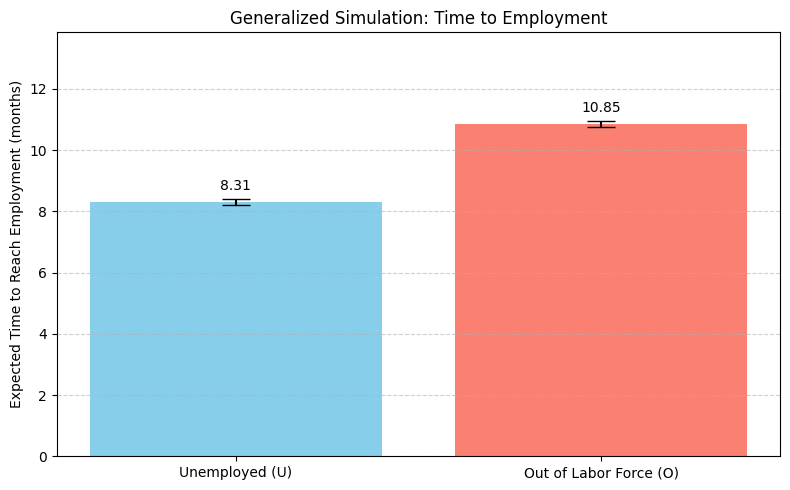

From U to E: mean = 8.31 months, std = 9.32
From O to E: mean = 10.85 months, std = 10.32


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define states
states = ['U', 'O', 'E']
state_idx = {s: i for i, s in enumerate(states)}

# Transition rate matrix (Q-matrix)
# Rows sum to the negative of the total exit rate from a state (diagonal not needed for simulation)
Q = np.array([
    # To:     U      O      E
    [   0.0,  0.10,  0.15],  # From U
    [  0.05,  0.0,   0.08],  # From O
    [  0.0,   0.0,   0.0 ]   # From E (absorbing)
])

# Simulate a trajectory to absorption
def simulate_to_absorption(start_state, Q, absorbing_states):
    state = state_idx[start_state]
    time = 0.0

    while state not in absorbing_states:
        rates = Q[state]
        total_rate = rates.sum()
        wait_time = np.random.exponential(1 / total_rate)
        probs = rates / total_rate
        next_state = np.random.choice(len(states), p=probs)
        state = next_state
        time += wait_time

    return time

# Run n simulations
def simulate_n_times(start_state, Q, absorbing_states, n=10000):
    times = [simulate_to_absorption(start_state, Q, absorbing_states) for _ in range(n)]
    return np.mean(times), np.std(times)

# Simulate from U and O to absorption in E
mean_U, std_U = simulate_n_times('U', Q, [state_idx['E']], n=10000)
mean_O, std_O = simulate_n_times('O', Q, [state_idx['E']], n=10000)

# Plot results
labels = ['Unemployed (U)', 'Out of Labor Force (O)']
means = [mean_U, mean_O]
errors = [std_U / np.sqrt(10000), std_O / np.sqrt(10000)]  # Using SEM

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, means, yerr=errors, capsize=10, color=['skyblue', 'salmon'])
plt.ylabel('Expected Time to Reach Employment (months)')
plt.title('Generalized Simulation: Time to Employment')

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.3, f"{yval:.2f}", ha='center', va='bottom')

plt.ylim(0, max(means) + 3)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Print results
print(f"From U to E: mean = {mean_U:.2f} months, std = {std_U:.2f}")
print(f"From O to E: mean = {mean_O:.2f} months, std = {std_O:.2f}")

The above code simulates the average time it takes for individuals to become employed (reach state 'E') starting from two different initial states: unemployed ('U') or out of the labor force ('O'). It uses a continuous-time Markov process with defined monthly transition rates between states ('U', 'O', and 'E'), where employment is an absorbing state — once reached, the process ends. The simulation randomly generates thousands of individual trajectories based on exponential waiting times, reflecting the probabilistic nature of job transitions. It then computes the mean and variability of the time taken to reach employment from each starting point. Finally, the results are visualized using a bar chart, showing that individuals who start unemployed typically reach employment faster on average than those who begin out of the labor force. Error bars (tiny horizontal lines on top of each bar): These represent uncertainty in the estimate of the mean, likely the standard error of the mean (SEM). The SEM is small, meaning the simulation is stable and the estimated averages are statistically reliable.

What this plot may imply :

Being actively unemployed (seeking work) leads to faster employment outcomes than being disconnected from the labor force (not actively looking for work).

The larger average time and greater variability from the O state reflect the indirect route that often involves returning to U before reaching E.

This Python code simulates and plots a single sample path of a labor market Markov Jump Process (MJP), showing how an individual transitions between states ("Unemployed", "Out of Labor Force", and "Employed") until they first reach employment.

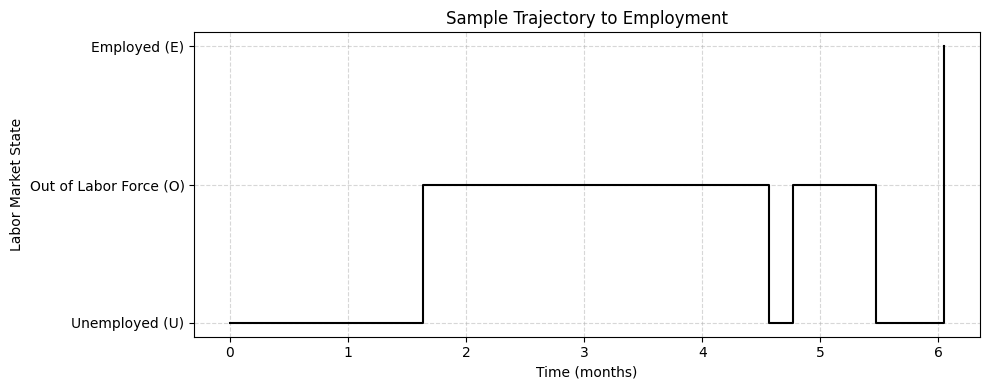

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Transition rates (per month)
rates = {
    'UE': 0.15,
    'UO': 0.10,
    'OE': 0.08,
    'OU': 0.05
}

# Simulate one trajectory to E
def simulate_to_E_trajectory(start_state, rates):
    current_state = start_state
    time = 0.0
    time_points = [0.0]
    state_sequence = [current_state]

    while current_state != 'E':
        if current_state == 'U':
            total_rate = rates['UE'] + rates['UO']
            wait_time = np.random.exponential(1 / total_rate)
            next_state = 'E' if np.random.rand() < rates['UE'] / total_rate else 'O'
        elif current_state == 'O':
            total_rate = rates['OE'] + rates['OU']
            wait_time = np.random.exponential(1 / total_rate)
            next_state = 'E' if np.random.rand() < rates['OE'] / total_rate else 'U'

        time += wait_time
        current_state = next_state
        time_points.append(time)
        state_sequence.append(current_state)

    return time_points, state_sequence

# Run a single trajectory from 'U'
times, state_sequence = simulate_to_E_trajectory('U', rates)

# Map states to y-values for plotting
state_map = {'U': 0, 'O': 1, 'E': 2}
y_values = [state_map[s] for s in state_sequence]
state_labels = ['Unemployed (U)', 'Out of Labor Force (O)', 'Employed (E)']

# Plot the trajectory
plt.figure(figsize=(10, 4))
plt.step(times, y_values, where='post', color='black')
plt.yticks([0, 1, 2], state_labels)
plt.xlabel('Time (months)')
plt.ylabel('Labor Market State')
plt.title('Sample Trajectory to Employment')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The code simulates a single trajectory of a continuous-time Markov jump process that models an individual’s path through the labor market until they become employed. Starting from the Unemployed (U) state, the individual transitions randomly between states based on specified transition rates: from U to Employed (E) or Out of the Labor Force (O), and from O to either E or U. At each step, the time spent in the current state is sampled from an exponential distribution, and the next state is chosen probabilistically according to the relative transition rates. The simulation continues until the individual reaches the Employed (E) state. The resulting trajectory is visualized as a step plot, where the x-axis represents time in months and the y-axis shows the current labor market state. This graphical representation helps illustrate the randomness of job-search spells and the sequence of transitions individuals may experience before securing employment.

## REFERENCES

* Rey, C., Bansaye V., Lecture Notes. Processus Markov & Applications [MAP566B]

* Labor Market Dynamics: A Hidden Markov Approach by Ippei Shibata (IMF Working Paper)

*  Markov chains, by J.R.Norris

*   Burdett, K., Kiefer, N. M., Mortensen, D. T., & Neumann, G. R. (1981). A Markov model of employment, unemployment and labor force participation: Estimates from the DIME data (Discussion Paper No. 483).

*   Markov processes, Lecture notes by A.Eberle




